In [1]:
import math

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

path = './nooticing.gml'
graph = nx.read_gml(path)
name = "2 links out"


In [3]:
print(graph.number_of_nodes())
print(graph.number_of_edges())

nodesList = list(graph.nodes)
for x in range(0,6):
    print(nodesList[x])
    print("Degree: "+str(graph.degree(nodesList[x])))


6926
61304
Maverick#6872
Degree: 16
zealand12b#3184
Degree: 238
burr#0105
Degree: 210
Boony ♡#0966
Degree: 92
Zurashi#2347
Degree: 16
Lunar#0270
Degree: 127


In [4]:
# Functions For Graph Properties
large = True # will computation for lots of these values take time/be impossible
nodesList = list(graph.nodes)



In [5]:
# Detailed Description of Network/Global Properties and Averages
# num nodes, num edges, density
numNodes = graph.number_of_nodes()
numLinks = graph.number_of_edges()

def Lmax(graph,n,l):
    numNodes = graph.number_of_nodes()
    numLinks = graph.number_of_edges()
    lmax = (numNodes*(numNodes-1))/2
    return lmax

def density(graph,n,l):
    d = (l/Lmax(graph,n,l))
    return d


def averageDegree(graph,n,l):
    k = (2*l)/n
    return k

def expectedAvgPathLength(graph,n,l,k):
    return (math.log(n)/math.log(k)) # double check what this does

def diameter(graph):
    return nx.diameter(graph)

In [6]:
lm = Lmax(graph,numNodes,numLinks)
dens = density(graph,numNodes,numLinks)
k = averageDegree(graph,numNodes,numLinks)
expectedAvgPathLen = expectedAvgPathLength(graph,numNodes,numLinks,k)



In [7]:
diameterOfGraph = diameter(graph)
# diameterOfGraph = "Not Possibly Computable"

In [8]:
# Identify important nodes (betweenness centrality, hubs, etc) and give analysis.

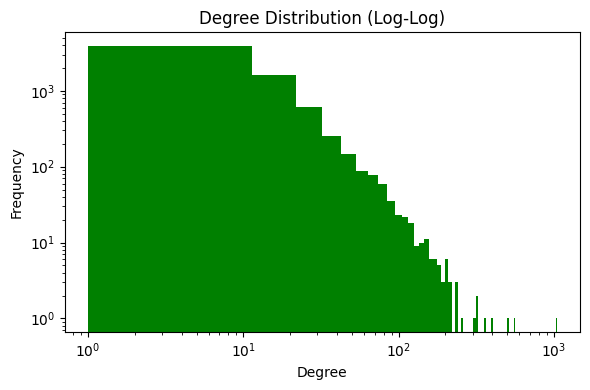

Alpha (power-law exponent): 3.3428947997401757
xmin (cutoff where power-law starts): 68.0
Comparison: R = 24.468379464053722, p = 0.07005545754599886
→ No strong evidence that power-law is better


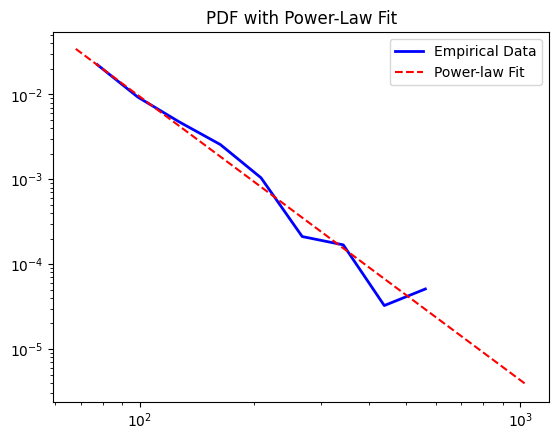

In [ ]:
import powerlaw
# Degree Distribution and Analysis (Graph) LogLog to check for scale free.
def max_degree_helper(network): #just the same function from before but it returns the value instead of printing it
    maxDegree = 0
    for i in network:
        if(network.degree[i] > maxDegree):
            maxDegree = network.degree[i]
    return maxDegree

def degree_structure_data(network): # I just rewrote this function instead of editing the original.
    dict = {}
    for n in network:
        deg = network.degree[n]
        if(deg in dict):
            dict[deg] = dict[deg] + 1
        else:
            dict[deg] = 1
    degree = []
    count_list = []
    for x in range(0,max_degree_helper(network)+1):
        degree.append(x)
        if (dict.get(x) == None):
            count_list.append(0)
        else:
            count_list.append(dict.get(x))
    return degree, count_list

plotData = degree_structure_data(graph)
plt.plot(plotData[0], plotData[1], color='green')
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Structure Visualized")
plt.show()
plt.plot(plotData[0], plotData[1], color='green')
# plt.xlim(0,500000)
# plt.ylim(0,500000)
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Structure Visualized")
plt.xscale('log')
plt.yscale('log')
plt.show()
degrees = [deg for _, deg in graph.degree()]  # for unweighted degree
# degrees = [deg for _, deg in G.degree(weight='weight')]  # if you want weighted degree

# === Plot the degree distribution (log-log) ===
plt.figure(figsize=(6,4))
plt.title("Degree Distribution (Log-Log)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.yscale("log")
plt.xscale("log")
plt.hist(degrees, bins=100, color="green")
plt.tight_layout()
plt.show()

# === Fit and analyze power-law ===
fit = powerlaw.Fit(degrees, verbose=False)
print("Alpha (power-law exponent):", fit.power_law.alpha)
print("xmin (cutoff where power-law starts):", fit.power_law.xmin)

# === Compare with exponential distribution ===
R, p = fit.distribution_compare('power_law', 'exponential')
print(f"Comparison: R = {R}, p = {p}")
if R > 0 and p < 0.05:
    print("→ Power-law is a better fit than exponential (statistically significant)")
else:
    print("→ No strong evidence that power-law is better")

# === Optional: Plot the PDF with power-law overlay ===
fig = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig)
plt.title("PDF with Power-Law Fit")
plt.legend(['Empirical Data', 'Power-law Fit'])
plt.show()



In [10]:
# Shortest Path



# Clustering Coefficient

# Betweenness Centrality Visualization and Analysis

In [11]:
# Other Calculated properties with visualization and analysis
# Adgree assortativity/correlation, are high degree nodes attached to other high degree nodes
pearson_correlation = nx.degree_assortativity_coefficient(graph)
# maybe do clan assortivity, assort_clan = nx.attribute_assortativitty_coefficient(graph, clan)


In [12]:
# Conclusion of Scale-free, Random, or other with analysis

In [13]:
# Output Area
print("================================")
# Name
print("      - Graph: "+name+" -      \n")
print("     - Homework Style Data -    \n") 
# Global Properties and Averages
print("Number of nodes:\t",numNodes)
print("Number of edges:\t",numLinks)
print("Undirected or Directed:\t UNDIRECTED")
print("Weighted or Unweighted:\t WEIGHTED")
print("L-Max:\t\t\t",str(lm))
print("Density:\t\t",str(dens))
if dens < 0.25:
    sparse = "Sparse"
else:
    sparse = "Dense"
print("Dense or Sparse:\t",sparse)
print("Average Degree <k>:\t",k)
print("Network Diameter:\t",diameterOfGraph)


print("Pearson Correlation:\t",pearson_correlation)
if pearson_correlation > 0:
    degAssort = "Assortative"
else:
    degAssort = "Disassortative"
print("Degree Assortivity:\t",degAssort)


      - Graph: 2 links out -      

     - Homework Style Data -    

Number of nodes:	 6926
Number of edges:	 61304
Undirected or Directed:	 UNDIRECTED
Weighted or Unweighted:	 WEIGHTED
L-Max:			 23981275.0
Density:		 0.002556327801586863
Dense or Sparse:	 Sparse
Average Degree <k>:	 17.702570025989026
Network Diameter:	 5
Pearson Correlation:	 -0.07485781827450062
Degree Assortivity:	 Disassortative
